\title{Diode Connected MOSFET Tobology}
\author{Steven K Armour}
\maketitle

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#References--(Need-to-Finish)" data-toc-modified-id="References--(Need-to-Finish)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>References  (Need to Finish)</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Diode-Connected-NMOS" data-toc-modified-id="Diode-Connected-NMOS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diode Connected NMOS</a></span><ul class="toc-item"><li><span><a href="#Square-Law-Theory" data-toc-modified-id="Square-Law-Theory-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Square Law Theory</a></span><ul class="toc-item"><li><span><a href="#Simplified-Analysis" data-toc-modified-id="Simplified-Analysis-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Simplified Analysis</a></span></li><li><span><a href="#Full-Analysis" data-toc-modified-id="Full-Analysis-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Full Analysis</a></span></li><li><span><a href="#Difference-Between-Simplified-and-Full-analysis" data-toc-modified-id="Difference-Between-Simplified-and-Full-analysis-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Difference Between Simplified and Full analysis</a></span></li><li><span><a href="#Diode-Connected-as-a-Topology-Slice" data-toc-modified-id="Diode-Connected-as-a-Topology-Slice-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Diode Connected as a Topology Slice</a></span></li></ul></li><li><span><a href="#SPICE-Diode-Connected-NMOS" data-toc-modified-id="SPICE-Diode-Connected-NMOS-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>SPICE Diode Connected NMOS</a></span><ul class="toc-item"><li><span><a href="#SPICE-analysis-of-TSMC-180nm-Diode-Connected-NMOS" data-toc-modified-id="SPICE-analysis-of-TSMC-180nm-Diode-Connected-NMOS-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>SPICE analysis of TSMC 180nm Diode Connected NMOS</a></span></li><li><span><a href="#SPICE-Confirmation-of-Topology-Interpretation" data-toc-modified-id="SPICE-Confirmation-of-Topology-Interpretation-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>SPICE Confirmation of Topology Interpretation</a></span></li><li><span><a href="#Testing-the-frequency-dependence-of-the-Bias-point" data-toc-modified-id="Testing-the-frequency-dependence-of-the-Bias-point-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Testing the frequency dependence of the Bias point</a></span></li></ul></li></ul></li><li><span><a href="#Diode-Connected-PMOS" data-toc-modified-id="Diode-Connected-PMOS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Diode Connected PMOS</a></span><ul class="toc-item"><li><span><a href="#Square-Law-Theory" data-toc-modified-id="Square-Law-Theory-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Square Law Theory</a></span><ul class="toc-item"><li><span><a href="#Simplifed" data-toc-modified-id="Simplifed-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Simplifed</a></span></li></ul></li></ul></li><li><span><a href="#I-will-finish-this-later" data-toc-modified-id="I-will-finish-this-later-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>I will finish this later</a></span></li></ul></div>

# Background
The Diode connected Mosfet is one of the four single Mosfet topologies (the others being CS, CD, CG) where the Mosfets gate is connected to its drain (for both NMOS and PMOS) thereby forcing it to behave much like a Diode till certain compliance voltage is reached. This compliance voltage is similar to the Diodes threshold voltage and where beyond this point the MOSFET will no longer conduct current at meaningful amounts. 

The usage of diode-connected MOSFETs is important not only in creating a pseudo Diode to then recreate notable diode topologies such as Half and Full wave rectifiers. But are also used like diodes in waveform shaping and biasing to eliminate resistors where possible at the ASIC level. The two most common first exposure to diode-connected MOSFETs come by way of the  Saturated Enhancement loaded inverters in Digital MOSFETs topologies and in biasing and the current reference of current mirrors in Analog Mosfet topologies.    

(insert images)

# References  (Need to Finish)

# Imports

In [1]:
from sympy import *
init_printing()

import numpy as np
import pandas as pd
from itertools import product as IProd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [2]:
import nbimporter
nbimporter.options['only_defs'] = False
from SympyMOSModels import *

Importing Jupyter notebook from SympyMOSModels.ipynb


In [3]:
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

libraries_path = 'SpiceLib/'
spice_library = SpiceLibrary(libraries_path)

# Diode Connected NMOS
(Insert Image)

## Square Law Theory 

The Diode Connected NMOS is defined as the $V_{GS}=V_{DS}$ made possible by the connection of the gate to the drain. And in this analysis we will assume that the body voltage is not in play.

In [4]:
VD, VS=symbols('V_D, V_S')

### Simplified Analysis
In the simplified analysis, we forgo the channel length modulation effect. And we proceed with the analysis of the NMOS via expanding $V_{DS}=V_D-V_S$ where we affix the $V_D$.

In the simplified analysis, we forgo the channel length modulation effect. And we proceed with the analysis of the NMOS via expanding $V_{DS}=V_D-V_S$ where we affix the $V_D$.

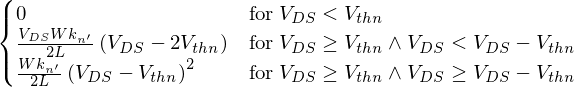

In [5]:
NIdSimpDiodConected=simplify(NMOS.IdSimp(subs={VGS:VDS}))
NIdSimpDiodConected

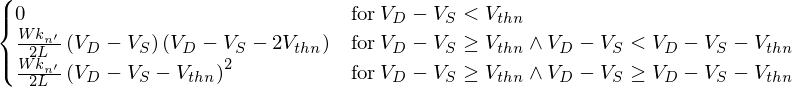

In [6]:
NIdSimpDiodConected=NIdSimpDiodConected.subs(VDS, VD-VS)
NIdSimpDiodConected

The following example values for a greater than $1\mu m$ device are based on example 19.1 load NMOS from chapter 19 of reference DeMassa 

In [7]:
subsN={W:5e6,L:15e6, nTechConst:20e-6, Vnth:1.1, VnA:1/.02, VD:5}

In [8]:
NIdSimpDiodConectedN=lambdify(VS, NIdSimpDiodConected.subs(subsN), dummify=False)
NIdSimpDiodConectedN(3.3)

array(1.199999999999999e-06)

In [9]:
VSN=np.linspace(0, 5)

In [10]:
VSN=np.linspace(0, 5)
NIdSimpDiodData=pd.DataFrame()
NIdSimpDiodData['Vs[V]']=VSN
NIdSimpDiodData['Id[A]']=NIdSimpDiodConectedN(VSN)
NIdSimpDiodData['DIdDVs[OhmInv]']=np.gradient(NIdSimpDiodData['Id[A]'], NIdSimpDiodData['Vs[V]'])
NIdSimpDiodData['DDIdDDVs']=np.gradient(NIdSimpDiodData['DIdDVs[OhmInv]'], NIdSimpDiodData['Vs[V]'])
NIdSimpDiodData['DDDIdDDDVs']=np.gradient(NIdSimpDiodData['DDIdDDVs'], NIdSimpDiodData['Vs[V]'])
NIdSimpDiodData.describe()

,Vs[V],Id[A],DIdDVs[OhmInv],DDIdDDVs,DDDIdDDDVs
count,50.000000,5.000000e+01,5.000000e+01,50.000000,5.000000e+01
mean,2.500000,1.342977e-05,-1.019380e-05,0.000005,-4.900000e-07
std,1.487488,1.560910e-05,8.736476e-06,0.000003,5.995389e-06
min,0.000000,0.000000e+00,-2.565986e-05,0.000000,-2.410473e-05
25%,1.250000,8.150771e-08,-1.766667e-05,0.000004,-4.201283e-19
50%,2.500000,6.542010e-06,-9.333333e-06,0.000007,0.000000e+00
75%,3.750000,2.341484e-05,-1.000000e-06,0.000007,3.320369e-19
max,5.000000,5.070000e-05,0.000000e+00,0.000007,1.633333e-05


In [11]:
NVCompSimpLoc=np.where(NIdSimpDiodData['DDDIdDDDVs']==NIdSimpDiodData['DDDIdDDDVs'].min())[0][0]
NVCompSimp=NIdSimpDiodData['Vs[V]'][NVCompSimpLoc]
print(f'NMOS Simp Square Law Complince Voltage ={NVCompSimp:.3f}[V]')


NMOS Simp Square Law Complince Voltage =3.878[V]


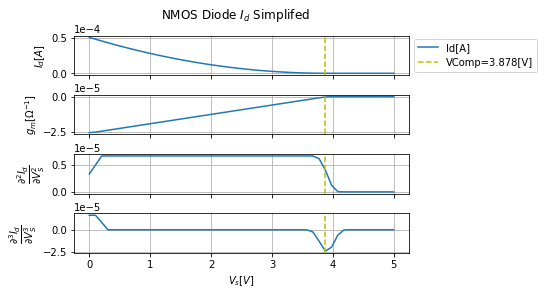

In [12]:
fig, [axId, axDId, axDDId, axDDDId]=plt.subplots(ncols=1, nrows=4, sharex=True)
NIdSimpDiodData.plot(ax=axId, x='Vs[V]', y='Id[A]', legend=False)
axId.axvline(x=NVCompSimp, linestyle='--', color='y', 
             label=f'VComp={NVCompSimp:.3f}[V]')

axId.set_ylabel('$I_d[A]$')
axId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axId.grid()

box = axId.get_position()
axId.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axId.legend(loc='center left', bbox_to_anchor=(1, 0.5))

NIdSimpDiodData.plot(ax=axDId, x='Vs[V]', y='DIdDVs[OhmInv]', legend=False)
axDId.axvline(x=NVCompSimp, linestyle='--', color='y')

axDId.set_ylabel(r'$g_m[\Omega^{-1}]$')
axDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDId.grid()


NIdSimpDiodData.plot(ax=axDDId, x='Vs[V]', y='DDIdDDVs', legend=False)
axDDId.axvline(x=NVCompSimp, linestyle='--', color='y')

axDDId.set_ylabel('$\dfrac{\partial^2 I_d}{\partial V_{S}^2}$')
axDDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDDId.grid()




NIdSimpDiodData.plot(ax=axDDDId, x='Vs[V]', y='DDDIdDDDVs', legend=False)
axDDDId.axvline(x=NVCompSimp, linestyle='--', color='y')

axDDDId.set_ylabel('$\dfrac{\partial^3 I_d}{\partial V_{S}^3}$')
axDDDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDDDId.set_xlabel('$V_s[V]$')
axDDDId.grid()

fig.subplots_adjust(hspace=.5)
plt.suptitle('NMOS Diode $I_d$ Simplifed ');


In the above graph, the substitutions were made to our simple model and `lambdify` was utilized to create a numerical version of the symbolic model of a greater than $1\mu m$ Diode connected NMOS device. As well be seen later the transconductance ($g_m$) dictates the behavior of the Diode Connected NMOS. And as the differential voltage $V_{DS}$ becomes less, remember $V_D$ is fixed the conductance of the Diode Connect NMOS drops before shutting off much like that of an ordinary rectifying diode as the voltage differential between its terminals approaches the Diodes threshold voltage. Unlike the Diode, this voltage is typically referred to as the compliance voltage. Where we by examining up to the third derivative of the $I_d$ we respect to the changing $V_s$ we can ascertain the compliance voltage exactly (within the scope of the model)

### Full Analysis
In this full analysis, the Channel Length Modulation effect $\dfrac{V_{DS}}{V_A}$ is not ignored and proceed through the analysis as was done in the Simplified Analysis

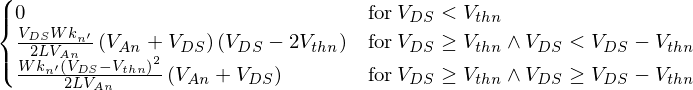

In [13]:
NIdFullDiodConected=simplify(NMOS.IdFull(subs={VGS:VDS}))
NIdFullDiodConected

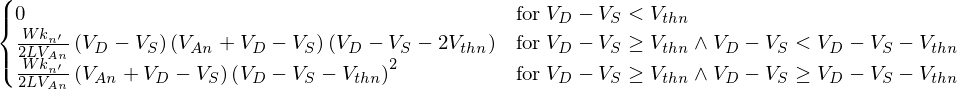

In [14]:
NIdFullDiodConected=NIdFullDiodConected.subs(VDS, VD-VS)
NIdFullDiodConected

In [15]:
NIdFullDiodConectedN=lambdify(VS, NIdFullDiodConected.subs(subsN), dummify=False)
NIdFullDiodConectedN(3.3)

array(1.2408000000000009e-06)

In [16]:
VSN=np.linspace(0, 5)
NIdFullDiodData=pd.DataFrame()
NIdFullDiodData['Vs[V]']=VSN
NIdFullDiodData['Id[A]']=NIdFullDiodConectedN(VSN)
NIdFullDiodData['DIdDVs[OhmInv]']=np.gradient(NIdFullDiodData['Id[A]'], NIdFullDiodData['Vs[V]'])
NIdFullDiodData['DDIdDDVs']=np.gradient(NIdFullDiodData['DIdDVs[OhmInv]'], NIdFullDiodData['Vs[V]'])
NIdFullDiodData['DDDIdDDDVs']=np.gradient(NIdFullDiodData['DDIdDDVs'], NIdFullDiodData['Vs[V]'])
NIdFullDiodData.describe()

,Vs[V],Id[A],DIdDVs[OhmInv],DDIdDDVs,DDDIdDDDVs
count,50.000000,5.000000e+01,50.000000,50.000000,5.000000e+01
mean,2.500000,1.452101e-05,-0.000011,0.000006,-6.134400e-07
std,1.487488,1.705876e-05,0.000010,0.000003,6.635026e-06
min,0.000000,0.000000e+00,-0.000029,0.000000,-2.486786e-05
25%,1.250000,8.359108e-08,-0.000019,0.000005,-4.000000e-07
50%,2.500000,6.869597e-06,-0.000010,0.000007,-4.000000e-07
75%,3.750000,2.517164e-05,-0.000001,0.000008,-4.000000e-07
max,5.000000,5.577000e-05,0.000000,0.000008,2.031467e-05


In [17]:
NVCompFullLoc=np.where(NIdFullDiodData['DDDIdDDDVs']==NIdFullDiodData['DDDIdDDDVs'].min())[0][0]
NVCompFull=NIdFullDiodData['Vs[V]'][NVCompFullLoc]
print(f'NMOS Full Square Law Complince Voltage ={NVCompFull:.3f}[V]')


NMOS Full Square Law Complince Voltage =3.878[V]


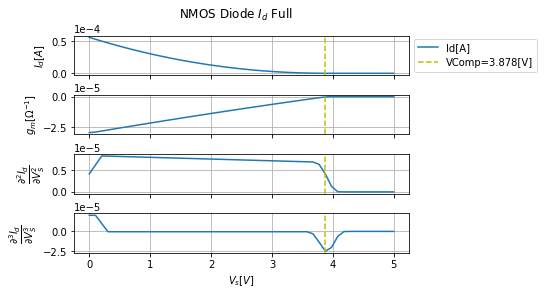

In [18]:
fig, [axId, axDId, axDDId, axDDDId]=plt.subplots(ncols=1, nrows=4, sharex=True)
NIdFullDiodData.plot(ax=axId, x='Vs[V]', y='Id[A]', legend=False)
axId.axvline(x=NVCompFull, linestyle='--', color='y', 
             label=f'VComp={NVCompFull:.3f}[V]')

axId.set_ylabel('$I_d[A]$')
axId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axId.grid()

box = axId.get_position()
axId.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axId.legend(loc='center left', bbox_to_anchor=(1, 0.5))

NIdFullDiodData.plot(ax=axDId, x='Vs[V]', y='DIdDVs[OhmInv]', legend=False)
axDId.axvline(x=NVCompFull, linestyle='--', color='y')

axDId.set_ylabel(r'$g_m[\Omega^{-1}]$')
axDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDId.grid()


NIdFullDiodData.plot(ax=axDDId, x='Vs[V]', y='DDIdDDVs', legend=False)
axDDId.axvline(x=NVCompFull, linestyle='--', color='y')

axDDId.set_ylabel('$\dfrac{\partial^2 I_d}{\partial V_{S}^2}$')
axDDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDDId.grid()




NIdFullDiodData.plot(ax=axDDDId, x='Vs[V]', y='DDDIdDDDVs', legend=False)
axDDDId.axvline(x=NVCompFull, linestyle='--', color='y')

axDDDId.set_ylabel('$\dfrac{\partial^3 I_d}{\partial V_{S}^3}$')
axDDDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDDDId.set_xlabel('$V_s[V]$')
axDDDId.grid()

fig.subplots_adjust(hspace=.5)
plt.suptitle('NMOS Diode $I_d$ Full ');


### Difference Between Simplified and Full analysis
We can compare not only the $I_d vs. V_S$ graphs for the two analysis but also the difference in the found Compliance Voltage to see if there are any difference in ignoring the Channel Length Modulation effect in a greater then $1\mu m$ Diode connected NMOS.

In [19]:
NVCompFull-NVCompSimp

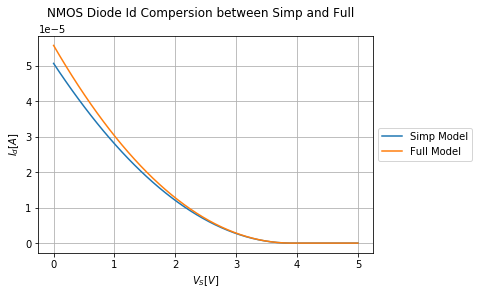

In [20]:
fig, ax=plt.subplots(nrows=1, ncols=1)
ax.plot(VSN, NIdSimpDiodConectedN(VSN), label='Simp Model')
ax.plot(VSN, NIdFullDiodConectedN(VSN), label='Full Model')
ax.set_xlabel('$V_S[V]$'); ax.set_ylabel('$I_d[A]$')
ax.grid()
ax.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.subplots_adjust(hspace=.5)
plt.suptitle('NMOS Diode Id Compersion between Simp and Full');

As is shown the differences between the Simplified and the Full analysis are minute for a diode connected NMOS ( be in mind a large channel NMOS).

### Diode Connected as a Topology Slice
In the following, we will examine the what a Diode Connected Transistor means in terms of the global view of $I_d$. This is maybe not a new viewpoint but a less common than the declaration that a Diode Connected MOSFET is always in the saturated state (This is true-ish up to the compliance voltage). But given the ease of data collection and analyses with `PySpice` and *Python* we can do better in predicting the Diode-Connected MOSFET from the transistors $I_d$ surface that shows the MOSFETS behaver for all combinations of $V_{GS}, V_{DS}$

In [21]:
NIdFullN=lambdify((VGS, VDS), NMOS.IdFull(subs=subsN), dummify=False)
VGSN, VDSN=np.meshgrid(np.linspace(0, 5), np.linspace(0, 5))
NIdFullNDate=NIdFullN(VGSN, VDSN)
NIdFullNDateDiag=NIdFullNDate.diagonal()
VdiagN=VGSN.diagonal()

<IPython.core.display.Javascript object>


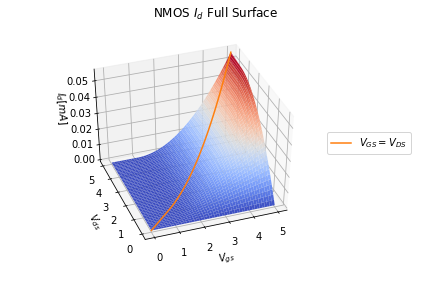

In [48]:
%matplotlib notebook
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
axId = fig.gca(projection='3d')
axId.set_xlabel('$V_{gs}$'); axId.set_ylabel('$V_{ds}$'); axId.set_zlabel('$I_d[mA]$')


surf = axId.plot_surface(VGSN, VDSN, NIdFullNDate*1000, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
axId.plot(VdiagN, VdiagN, NIdFullNDateDiag*1000, label='$V_{GS}=V_{DS}$')
box = ax.get_position()
axId.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axId.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle('NMOS $I_d$ Full Surface')
plt.show()

(if the 3D Graph is not showing up try rerunning the cell twice, at the time of this writing the nbmagic `notebook` is still a bit temperamental)

The above surface plot of the current for (this cant be stressed enough) large channel Full modeled NMOS shows every combination of $V_{GS}$ and $V_{DS}$ that effects the NMOS's $I_d$. Since we are interested in the Diode-Connected NMOS in this analysis we know that the regions of interest will be where $$V_{GS}=V_{DS}$$.
Thus we can find this ROI and overlay it on the $I_D$ surface and plot it individually below. The result is identical to what we predicted from modify the governing equations to the Diode-Connected topology. Save for the vertical mirroring that arises from the choice of fixing the $V_D$ and not the $V_S$.

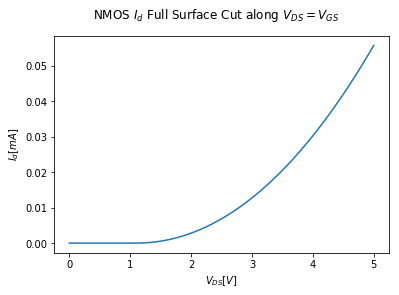

In [23]:
%matplotlib inline
Xdiag=VDSN.diagonal(); Zdiag=NIdFullNDate.diagonal()
fig, ax=plt.subplots(ncols=1, nrows=1)
ax.plot(Xdiag, Zdiag*1000)
ax.set_xlabel('$V_{DS}[V]$'); ax.set_ylabel('$I_d[mA]$')
plt.suptitle('NMOS $I_d$ Full Surface Cut along $V_{DS}=V_{GS}$');

## SPICE Diode Connected NMOS
Here we proceed with the same analysis but instead utilizing an older submicron NMOS technology. The technology that was chosen was the readily available Taiwan Semiconductor Manufacturing Company (TSMC) $180nm$ NMOS with a channel width and length set in the next cell. While the $180nm$ is not even close to there current cutting-edge $7nm$ process it does display non-square law effects without getting too much deviation from greater $1\mu m$ technology where the Square Law holds better. 

In [24]:
NMOSR_W=200; NMOSR_L=200 #nm

### SPICE analysis of TSMC 180nm Diode Connected NMOS

setup the "NetList"

In [25]:
TestCirN=Circuit('DCBench')
Vbs=TestCirN.V('bs', 'base', TestCirN.gnd, 0@u_V)
#VDD
Vds=TestCirN.V('ds', 'drain', TestCirN.gnd, 1.8@u_V)
#Vload
Vsgnd=TestCirN.V('sgnd', 'source', TestCirN.gnd, 0@u_V)

TestCirN.include(spice_library['TSMC180nmN'])
M0=TestCirN.MOSFET('0', 'drain', 'drain', 'source', 'base',
                          model='TSMC180nmN', 
                   length=NMOSR_L@u_nm, width=NMOSR_W@u_nm)
print(TestCirN)

.title DCBench
.include /home/iridium/string12oil@gmail.com/MyProjects/EEM-Circuits/MOSFET_Tobs/SpiceLib/TSMC180N.lib
Vbs base 0 0V
Vds drain 0 1.8V
Vsgnd source 0 0V
M0 drain drain source base TSMC180nmN l=200nm w=200nm



setup and run the Simulation

In [26]:
TempC=27
TestCirNSim=TestCirN.simulator(temperature=TempC, nominal_temperature=TempC)
TestCirNSimData=TestCirNSim.dc(Vsgnd=slice(0, 1.8, .01))

In [27]:
NDiodeConctedData=pd.DataFrame()
NDiodeConctedData['Vsgnd[V]']=pd.Series(TestCirNSimData.sweep)
NDiodeConctedData['Id[A]']=-TestCirNSimData.Vds
NDiodeConctedData.count()


Vsgnd[V]    181
Id[A]       181
dtype: int64

In [28]:
NDiodeConctedData['DIdDVs[OhmInv]']=np.gradient(NDiodeConctedData['Id[A]'], NDiodeConctedData['Vsgnd[V]'])
NDiodeConctedData['DDIdDDVs']=np.gradient(NDiodeConctedData['DIdDVs[OhmInv]'], NDiodeConctedData['Vsgnd[V]'])
NDiodeConctedData['DDDIdDDDVs']=np.gradient(NDiodeConctedData['DDIdDDVs'], NDiodeConctedData['Vsgnd[V]'])
NDiodeConctedData.describe()

,Vsgnd[V],Id[A],DIdDVs[OhmInv],DDIdDDVs,DDDIdDDDVs
count,181.000000,1.810000e+02,1.810000e+02,1.810000e+02,1.810000e+02
mean,0.900000,3.845577e-05,-8.825913e-05,1.163705e-04,-1.101192e-04
std,0.523943,4.931266e-05,8.334699e-05,1.504332e-04,1.701090e-03
min,0.000000,1.809886e-12,-2.096984e-04,-1.387779e-13,-7.176422e-03
25%,0.450000,3.238798e-11,-1.727597e-04,3.938239e-08,-1.725217e-07
50%,0.900000,8.786765e-06,-9.506566e-05,7.793643e-05,9.746982e-05
75%,1.350000,7.199544e-05,-1.099948e-09,1.514092e-04,1.931309e-04
max,1.800000,1.587005e-04,1.110223e-14,6.400539e-04,4.088288e-03


In [29]:
NVCompReal=NDiodeConctedData['Vsgnd[V]'][np.where(NDiodeConctedData['DDDIdDDDVs']==NDiodeConctedData['DDDIdDDDVs'].max())[0]]
NVCompReal=np.around(float(NVCompReal), 4); NVCompReal

In [30]:
NVbiasTarget=NVCompReal/2; NVbiasTarget

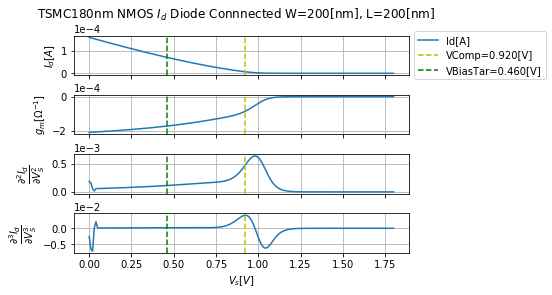

In [31]:
%matplotlib inline
fig, [axId, axDId, axDDId, axDDDId]=plt.subplots(ncols=1, nrows=4, sharex=True)
NDiodeConctedData.plot(ax=axId, x='Vsgnd[V]', y='Id[A]', legend=False)
axId.axvline(x=NVCompReal, linestyle='--', color='y', 
             label=f'VComp={NVCompReal:.3f}[V]')
axId.axvline(x=NVbiasTarget, linestyle='--', color='g',
            label=f'VBiasTar={NVbiasTarget:.3f}[V]')

axId.set_ylabel('$I_d[A]$')
axId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axId.grid()

box = axId.get_position()
axId.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axId.legend(loc='center left', bbox_to_anchor=(1, 0.5))

###############

NDiodeConctedData.plot(ax=axDId, x='Vsgnd[V]', y='DIdDVs[OhmInv]', legend=False)
axDId.axvline(x=NVCompReal, linestyle='--', color='y')
axDId.axvline(x=NVbiasTarget, linestyle='--', color='g')

axDId.set_ylabel(r'$g_m[\Omega^{-1}]$')
axDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDId.grid()

#######################################
NDiodeConctedData.plot(ax=axDDId, x='Vsgnd[V]', y='DDIdDDVs', legend=False)
axDDId.axvline(x=NVCompReal, linestyle='--', color='y')
axDDId.axvline(x=NVbiasTarget, linestyle='--', color='g')


axDDId.set_ylabel('$\dfrac{\partial^2 I_d}{\partial V_{S}^2}$')
axDDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDDId.grid()


#############################################

NDiodeConctedData.plot(ax=axDDDId, x='Vsgnd[V]', y='DDDIdDDDVs', legend=False)
axDDDId.axvline(x=NVCompReal, linestyle='--', color='y')
axDDDId.axvline(x=NVbiasTarget, linestyle='--', color='g')


axDDDId.set_ylabel('$\dfrac{\partial^3 I_d}{\partial V_{S}^3}$')
axDDDId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axDDDId.set_xlabel('$V_s[V]$')
axDDDId.grid()

fig.subplots_adjust(hspace=.5)
plt.suptitle(f'TSMC180nm NMOS $I_d$ Diode Connnected W={NMOSR_W}[nm], L={NMOSR_L}[nm]');


(Finish later)

### SPICE Confirmation of Topology Interpretation

Test Circuit for extracting NMOS characteristics curves 

In [32]:
TestCir=Circuit('DCBench')
Vgs=TestCir.V('gs', 'gate', TestCir.gnd, 1.8@u_V)
Vbs=TestCir.V('bs', 'base', TestCir.gnd, 0@u_V)
Vds=TestCir.V('ds', 'drain', TestCir.gnd, 1.8@u_V)

TestCir.include(spice_library['TSMC180nmN'])

M0=TestCir.MOSFET('0', 'drain', 'gate', TestCir.gnd, 'base',
                          model='TSMC180nmN', length=200@u_nm, width=200@u_nm)
print(TestCir)

.title DCBench
.include /home/iridium/string12oil@gmail.com/MyProjects/EEM-Circuits/MOSFET_Tobs/SpiceLib/TSMC180N.lib
Vgs gate 0 1.8V
Vbs base 0 0V
Vds drain 0 1.8V
M0 drain gate 0 base TSMC180nmN l=200nm w=200nm



Create simulation object

In [33]:
TempC=27
TestCirSim=TestCir.simulator(temperature=TempC, nominal_temperature=TempC)

In [34]:
x=np.linspace(0, 1.8)
y=np.linspace(0, 1.8)
X, Y=np.meshgrid(x, y)
len(x),len(y), np.prod([*X.shape])

(50, 50, 2500)

perform a DC operating point analyses at every combination of $V_{GS}$ and $V_{DS}$ specified and bind the results to a 2D array for use in plotting a 3D surface of $I_D$

In [35]:
Z=np.zeros(X.shape)
M0.length=200@u_nm
for i in IProd(x, y):
    Vgs.dc_value=i[0]@u_V; Vds.dc_value=i[1]@u_V
    TestCirSimData=TestCirSim.operating_point()    

    
    Z[np.where(x==i[0])[0], np.where(y==i[1])[0]]=np.array(-TestCirSimData.Vds)

In [36]:
DIdDVgs, DIdDVds=np.gradient(Z, x, y)
Av0=DIdDVgs/DIdDVds
DIdDVgsDiag=DIdDVgs.diagonal()
DIdDVdsDiag=DIdDVds.diagonal()
Av0Diag=Av0.diagonal()

In [37]:
Xdiag=X.diagonal(); ZDiag=1000*Z.diagonal()

<IPython.core.display.Javascript object>


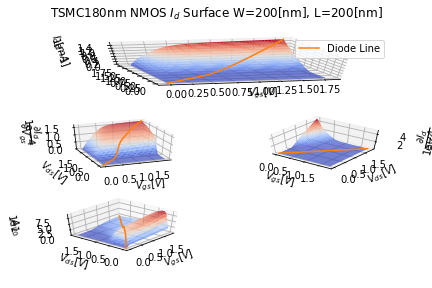

In [49]:
%matplotlib notebook
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
###############
axId = fig.add_subplot(3, 1, 1, projection='3d')
axId.set_xlabel('$V_{gs}[V]$'); ax.set_ylabel('$V_{ds}[V]$'); 
axId.set_zlabel('$I_d[mA]$')


axId.plot_surface(X, Y, Z*1000, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
axId.ticklabel_format(axis='z', style='sci', scilimits=(-1,1))

axId.plot(Xdiag, Xdiag, ZDiag, label='Diode Line')
axId.legend()

##################

axDIdDVgs = fig.add_subplot(3, 2, 3, projection='3d')

axDIdDVgs.set_xlabel('$V_{gs}[V]$'); axDIdDVgs.set_ylabel('$V_{ds}[V]$'); 
axDIdDVgs.set_zlabel('$\dfrac{\partial I_d}{\partial V_{gs}}$')


axDIdDVgs.plot_surface(X, Y, DIdDVgs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
axDIdDVgs.ticklabel_format(axis='z', style='sci', scilimits=(-1,1))

axDIdDVgs.plot(Xdiag, Xdiag, DIdDVgsDiag)

##############################

axDIdDVds = fig.add_subplot(3, 2, 4, projection='3d')
axDIdDVds.set_xlabel('$V_{gs}[V]$'); axDIdDVds.set_ylabel('$V_{ds}[V]$'); 
axDIdDVds.set_zlabel('$\dfrac{\partial I_d}{\partial V_{ds}}$')


axDIdDVds.plot_surface(X, Y, DIdDVds, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
axDIdDVds.plot(Xdiag, Xdiag, DIdDVdsDiag)
axDIdDVds.ticklabel_format(axis='z', style='sci', scilimits=(-1,1))

############################

axAv0 = fig.add_subplot(3, 2, 5, projection='3d')
axAv0.set_xlabel('$V_{gs}[V]$'); axAv0.set_ylabel('$V_{ds}[V]$'); 
axAv0.set_zlabel('$A_{V0}$')


axAv0.plot_surface(X, Y, Av0, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
axAv0.plot(Xdiag, Xdiag, Av0Diag)
axAv0.ticklabel_format(axis='z', style='sci', scilimits=(-1,1))


plt.suptitle(f'TSMC180nm NMOS $I_d$ Surface W={NMOSR_W}[nm], L={NMOSR_L}[nm]')
fig.subplots_adjust(hspace=.5, wspace=0.5);

plt.show()

(Need to Get a hold of the subplot numbering arghh)

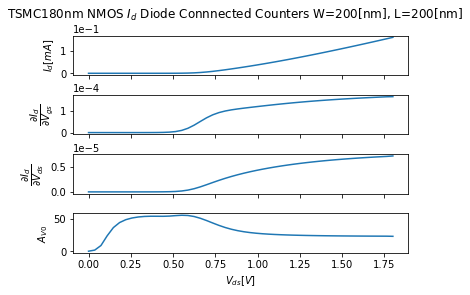

In [39]:
%matplotlib inline
fig, [axId, axDIdDVgs, axDIdDVds, axAv0]=plt.subplots(nrows=4, ncols=1, sharex=True)

axId.plot(Xdiag, ZDiag)
axId.set_ylabel('$I_d[mA]$')
axId.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))


#########################

axDIdDVgs.plot(Xdiag, DIdDVgsDiag)
axDIdDVgs.set_ylabel('$\dfrac{\partial I_d}{\partial V_{gs}}$')
axDIdDVgs.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))



########################

axDIdDVds.plot(Xdiag, DIdDVdsDiag)
axDIdDVds.set_ylabel('$\dfrac{\partial I_d}{\partial V_{ds}}$')
axDIdDVds.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))


#######################

axAv0.plot(Xdiag, Av0Diag)
axAv0.set_ylabel('$A_{V0}$')
axAv0.set_xlabel('$V_{ds}[V]$')

fig.subplots_adjust(hspace=.5)
plt.suptitle(f'TSMC180nm NMOS $I_d$ Diode Connnected Counters W={NMOSR_W}[nm], L={NMOSR_L}[nm]');


In the above graph there is a $A_{vo}$ where
$$A_{vo}=g_m r_{DS}=\dfrac{\partial I_d}{\partial V_{gs}}/\dfrac{\partial I_d}{\partial V_{ds}}$$
this is not a true intrensit gain. It is however a meassure of the influsince between $\dfrac{\partial I_d}{\partial V_{gs}}$ and $\dfrac{\partial I_d}{\partial V_{ds}}$ that shows that the transcondutance domonated the output resistince for a Diode connected NMOS 

### Testing the frequency dependence of the Bias point

In [40]:
TestCirSinN=Circuit('DCBench')
Vbs=TestCirSinN.V('bs', 'base', TestCirSinN.gnd, 0@u_V)
#VDD
Vds=TestCirSinN.V('ds', 'drain', TestCirSinN.gnd, 1.8@u_V)
#Vload
Vsgnd=TestCirSinN.Sinusoidal('sgnd', 'source', TestCirSinN.gnd, 
                             dc_offset=NVbiasTarget@u_V, 
                          amplitude=.1@u_V, frequency=1@u_kHz)

TestCirSinN.include(spice_library['TSMC180nmN'])
M0=TestCirSinN.MOSFET('0', 'drain', 'drain', 'source', 'base',
                          model='TSMC180nmN', length=200@u_nm, width=200@u_nm)
print(TestCirSinN)

.title DCBench
.include /home/iridium/string12oil@gmail.com/MyProjects/EEM-Circuits/MOSFET_Tobs/SpiceLib/TSMC180N.lib
Vbs base 0 0V
Vds drain 0 1.8V
Vsgnd source 0 DC 0.46V AC SIN(0V 0.1V 1kHz 0s 0Hz)
M0 drain drain source base TSMC180nmN l=200nm w=200nm



In [41]:
TempC=27
TestCirSinNSim=TestCirSinN.simulator(temperature=TempC, nominal_temperature=TempC)
TestCirSinNData=TestCirSinNSim.ac(start_frequency=1@u_Hz, stop_frequency=100@u_MHz, number_of_points=100,  variation='dec')

In [42]:
from PySpice.Plot.BodeDiagram import bode_diagram

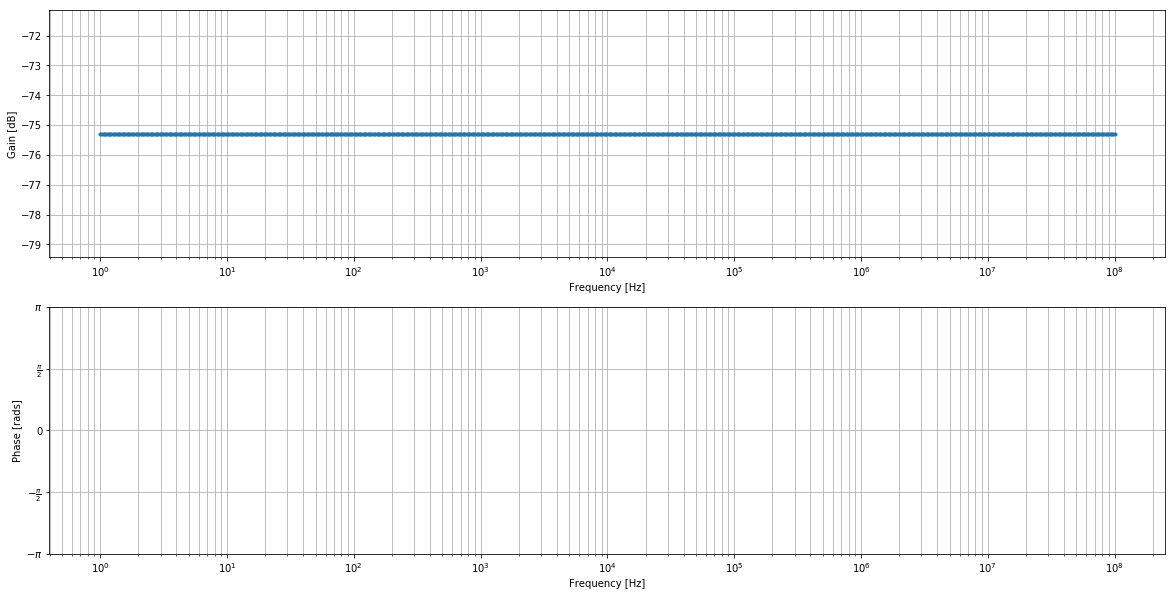

In [43]:
Id_Freq=pd.Series(-TestCirSinNData.Vds)
figure = plt.figure(1, (20, 10))
axes = (plt.subplot(211), plt.subplot(212))
bode_diagram(axes=axes,
             frequency=TestCirSinNData.frequency,
             gain=20*np.log10(np.absolute(Id_Freq)),
             phase=np.angle(Id_Freq, deg=True),
             marker='.',
             linestyle='-',
            )


# Diode Connected PMOS

## Square Law Theory

### Simplifed

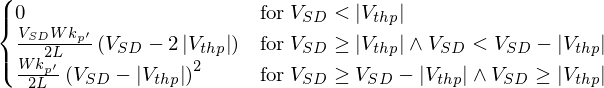

In [44]:
PIdSimpDiodConected=simplify(PMOS.IdSimp(subs={VSG:VSD}))
PIdSimpDiodConected

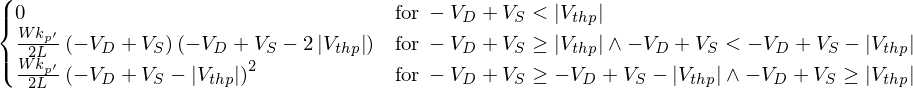

In [45]:
PIdSimpDiodConected=PIdSimpDiodConected.subs(VSD, VS-VD)
PIdSimpDiodConected

In [46]:
subsP={W:8e6,L:2e6, nTechConst:2e-6, Vnth:1.1, VnA:1/.02, VD:5}

# I will finish this later